In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def pic():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas3 = np.zeros((300, 300, 1), dtype="uint8")
    # blue=(0,0,255)
    cv2.rectangle(canvas3, (100, 100), (200, 200), 1, -1)

    plt.subplot(221), plt.imshow(canvas3, cmap='gray')
    plt.title('Single Region'), plt.xticks([]), plt.yticks([])
    return canvas3

(300, 300, 1)

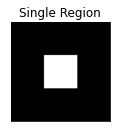

In [3]:
arr = pic()
width = arr.shape[0]
length = arr.shape[1]
arr.shape

In [4]:
def find_first_pixel(arr):
    stop_flag=0
   # canvas3 = pic()
    length = arr.shape[0]
    width = arr.shape[1]
    for i in range(length):
        if (stop_flag==0):
            for j in range(width):
                if (arr[i][j] == 1):
                    x = i
                    y = j
                    stop_flag=1
                    break
    return (x, y)


f = find_first_pixel(arr)
print(f)

(100, 100)


In [5]:
# works but doesn't handle outside pic pixels
def border_tracing(connectivity,arr):
    p0 = find_first_pixel(arr)
    row = p0[0] #current row
    col = p0[1] #current_column
    borders = [p0] #list to add p (border pixels)
    if (connectivity == 4):
        dirc = 3
        search = (dirc+3) % 4 #the next direction we're gonna check

        while(1):
            search_col = col #column of the next direction
            search_row = row            #row of the next direction
            
            if (search == 0):
                search_col = col+1 
        
            if (search == 1):
                search_row = row-1          
                if (search_row < 0):
                    search=search+1            
            if (search == 2):
                search_col = col-1
                if (search_col < 0):
                    search=search+1
               
            if (search == 3):
                search_row = row+1  

                
            if (arr[search_row][search_col] == 1): #when we find a pixel with intensity=1
                row = search_row
                col = search_col
                borders.append((row,col))
                if (borders[-1] == borders[1] and borders[-2] == borders[0] and len(borders)>2): #stopping criteria
                    break 
                
                if(borders[-1][1] > borders[-2][1]): # to right
                    dirc = 0                  
                elif(borders[-1][0] < borders[-2][0]): #upwards
                    dirc = 1
                elif(borders[-1][1] < borders[-2][1]): #to left
                    dirc = 2                      
                elif(borders[-1][0] > borders[-2][0]): #downwards 
                    dirc = 3        
                search = (dirc+3) % 4
            
            else:
                search = search+1
                if(search>3):
                    search=0

        return borders [:-2] #coz last two vals are repeated
    
b=border_tracing(4,arr)
b    

[(100, 100),
 (101, 100),
 (102, 100),
 (103, 100),
 (104, 100),
 (105, 100),
 (106, 100),
 (107, 100),
 (108, 100),
 (109, 100),
 (110, 100),
 (111, 100),
 (112, 100),
 (113, 100),
 (114, 100),
 (115, 100),
 (116, 100),
 (117, 100),
 (118, 100),
 (119, 100),
 (120, 100),
 (121, 100),
 (122, 100),
 (123, 100),
 (124, 100),
 (125, 100),
 (126, 100),
 (127, 100),
 (128, 100),
 (129, 100),
 (130, 100),
 (131, 100),
 (132, 100),
 (133, 100),
 (134, 100),
 (135, 100),
 (136, 100),
 (137, 100),
 (138, 100),
 (139, 100),
 (140, 100),
 (141, 100),
 (142, 100),
 (143, 100),
 (144, 100),
 (145, 100),
 (146, 100),
 (147, 100),
 (148, 100),
 (149, 100),
 (150, 100),
 (151, 100),
 (152, 100),
 (153, 100),
 (154, 100),
 (155, 100),
 (156, 100),
 (157, 100),
 (158, 100),
 (159, 100),
 (160, 100),
 (161, 100),
 (162, 100),
 (163, 100),
 (164, 100),
 (165, 100),
 (166, 100),
 (167, 100),
 (168, 100),
 (169, 100),
 (170, 100),
 (171, 100),
 (172, 100),
 (173, 100),
 (174, 100),
 (175, 100),
 (176, 100),

In [6]:
len(b)

400

In [7]:
#lecture example
#(still need to handle out of bound pixels (negative values))

arr_lec=np.array([[0,1,1,0,0,0,0],
    [1,1,1,1,1,1,1],
    [1,0,1,1,1,0,1],
     [1,0,0,1,1,1,1],
    [1,1,1,1,0,0,0],
    [0,0,1,1,0,0,0]])

In [ ]:
b=border_tracing(4,arr_lec)
b